# _Trial 27_

__July 10, 2019__

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# fastai libraries
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *
from fastai.callbacks import EarlyStoppingCallback, SaveModelCallback

In [3]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
path = Config.data_path()
path

PosixPath('/home/jupyter/springboard-capstone-2/data')

# _Load in Data_

In [5]:
from test_folder import sample

In [6]:
train_df, valid_df = sample.prep_data(path);

Read in training and validation data sets
------------------------------
Added column to both data sets that indicates if observation is part of validation set or not.
------------------------------
Extracted patient ID and study number for each observation and assigned into new columns.
------------------------------
Filled in NaNs within pathology columns with 0 (see Stanford ML Github for further information on dealing with NaNs).
------------------------------
Converted pathology columns to integer type.
------------------------------
Pre-replacement Label Distribution: Label 0 = 188327, Label 1 = 27000, Label -1 = 8087
------------------------------
Replaced uncertain labels in Cardiomegaly column with 0 (i.e. negative)
Post-replacement Label Distribution: Label 0 = 196414, Label 1 = 27000
Does number of post-replacement 0 labels equal the sum of pre-replacement -1s and 0s? True
Returned training and validation data sets as pandas dataframes.


In [7]:
# set seed to help with reproducibility
sample.set_seed(1)

In [8]:
full_df = sample.undersample_and_prep(train_df, valid_df);

Created two new data sets, one with positive observations and the other with the negatives.
The shape of dataframe containing 0 (negative) labels: (196414, 22)
The shape of dataframe containing 1 (positive) labels: (27000, 22)
------------------------------
Random under-sampling: 
1    27000
0    27000
Name: Cardiomegaly, dtype: int64
------------------------------
Reshuffled rows in new undersampled dataframe.
------------------------------
Concatenated undersampled training data set with validation data.
Returning full data set.


In [9]:
full_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,valid,patient,study
0,CheXpert-v1.0-small/train/patient37703/study1/...,Female,57,Frontal,AP,0,0,0,1,1,0,1,0,0,0,0,0,0,0,False,patient37703,study1
1,CheXpert-v1.0-small/train/patient25282/study5/...,Female,90,Frontal,AP,0,0,1,0,0,1,0,0,0,0,0,0,0,1,False,patient25282,study5
2,CheXpert-v1.0-small/train/patient28261/study12...,Female,80,Frontal,AP,0,0,0,0,0,1,1,0,1,0,1,0,0,1,False,patient28261,study12
3,CheXpert-v1.0-small/train/patient26703/study3/...,Female,48,Frontal,AP,0,0,1,1,0,0,-1,0,0,0,0,0,0,0,False,patient26703,study3
4,CheXpert-v1.0-small/train/patient46830/study2/...,Male,63,Frontal,AP,0,0,1,0,0,1,0,0,0,0,0,0,0,1,False,patient46830,study2


# _Deep Learning Fast.ai Set Up_

In [10]:
from test_folder import replicate

src = replicate.get_src(full_df, path, feature_col='Cardiomegaly')

In [11]:
# use image size of 64
data = replicate.get_data(64, src)

using bs=16, have 7601MB of GPU RAM free.
------------------------------
Data ready.


# _Create DenseNet Model_

# _First Round of Training_

In [12]:
learn = cnn_learner(data=data, base_arch=models.densenet121, metrics=[AUROC(), Precision(), Recall()],
                    pretrained=True, ps=0.5, bn_final=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.51E-07
Min loss divided by 10: 2.51E-01


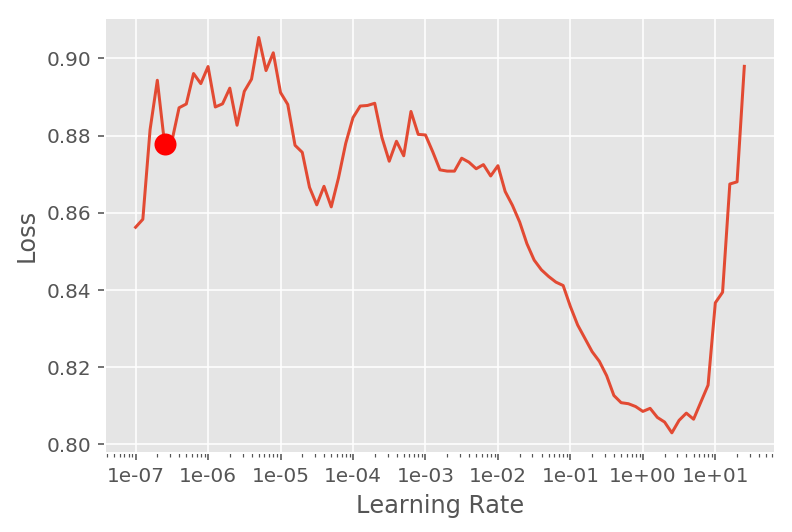

In [13]:
from test_folder import deeplearning

deeplearning.lr_finder_plot(learn);

In [14]:
learn.fit_one_cycle(3, 1e-1, callbacks=
                    [SaveModelCallback(learn, every='improvement', monitor='auroc', name='best_densenet121_trial27-rd1')])

epoch,train_loss,valid_loss,auroc,precision,recall,time
0,0.629075,0.588281,0.769135,0.464912,0.779412,07:26
1,0.593486,0.621027,0.706414,0.460526,0.514706,06:49
2,0.539184,0.483165,0.807140,0.610169,0.529412,06:51


Better model found at epoch 0 with auroc value: 0.7691352963447571.
Better model found at epoch 2 with auroc value: 0.8071403503417969.
